This notebook demonstrates a quantile normalization workflow for genetic phenotype simulations. First, we simulate phenotypic traits by selecting causal mutations and modeling their effects with a normal distribution (mean=0, variance=1). Then, we generate genetic values for individuals based on additive effect sizes, add environmental noise to create realistic phenotypes with a specified heritability (h²=0.5), and then apply quantile normalization to standardize the distributions. The notebook shows multiple scenarios including single and multi-causal mutation models, demonstrating different normalization options (normalizing genetic values only, phenotypes only, or both) using the quantile_normalize function, with the resulting dataframes containing columns for causal mutation IDs, individual IDs, genetic values, environmental noise, phenotypes, and normalized values.

In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import quantile_normalize



The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation. The bash script below will function as expected given the relative path for the source data file is accurate.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


First, we demonstrate quantile normalization for single causal mutation's phenotypic dataframe.

In [4]:
mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

In [5]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal, random_seed=1)
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #non-normalized genetic value df
phenotypes = sim_env_noise(individual_genetic_value_df, h2=0.5) #simulating environmental noise without normalizing genetic values
phenotype_df = phenotypes.phenotype_df
phenotype_df_1 = phenotype_df.copy()
phenotype_df_2 = phenotype_df.copy()
phenotype_df


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-16.501664,6.283190,-10.218473
1,0,1,-2.454348,-15.108322,-17.562670
2,0,2,-17.303803,8.479830,-8.823973
3,0,3,6.641214,-3.556042,3.085172
4,0,4,-8.710213,-17.959678,-26.669890
...,...,...,...,...,...
195,0,195,12.536488,-4.917285,7.619204
196,0,196,16.549154,-17.814738,-1.265584
197,0,197,5.463626,18.544546,24.008172
198,0,198,-0.663779,17.489561,16.825782


In [6]:
quantile_normalize_phenotype_df = quantile_normalize(phenotype_df) #quantile normalized to the normal distribution
quantile_normalize_phenotype_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-16.501664,6.283190,-10.218473,0.138304
1,0,1,-2.454348,-15.108322,-17.562670,-0.279319
2,0,2,-17.303803,8.479830,-8.823973,0.240426
3,0,3,6.641214,-3.556042,3.085172,0.706303
4,0,4,-8.710213,-17.959678,-26.669890,-0.738847
...,...,...,...,...,...,...
195,0,195,12.536488,-4.917285,7.619204,0.954165
196,0,196,16.549154,-17.814738,-1.265584,0.510073
197,0,197,5.463626,18.544546,24.008172,2.326348
198,0,198,-0.663779,17.489561,16.825782,1.750686


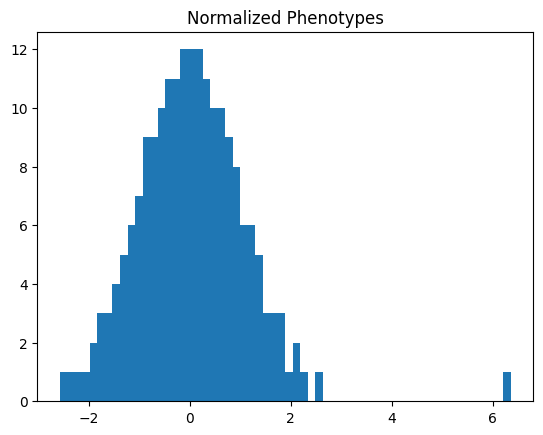

Mean of phenotypes: 0.031806704448487086
Standard deviation of phenotypes: 1.0757478165020662


In [7]:
plt.hist(quantile_normalize_phenotype_df["normalized_phenotype"], bins=60)
plt.title("Normalized Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].std()))

In [8]:
quantile_normal_genetic_df = quantile_normalize(phenotype_df_1, phenotype_normalize=False)
quantile_normal_genetic_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-16.501664,6.283190,-10.218473,-0.398855
1,0,1,-2.454348,-15.108322,-17.562670,0.722479
2,0,2,-17.303803,8.479830,-8.823973,-0.453762
3,0,3,6.641214,-3.556042,3.085172,1.372204
4,0,4,-8.710213,-17.959678,-26.669890,0.189118
...,...,...,...,...,...,...
195,0,195,12.536488,-4.917285,7.619204,2.053749
196,0,196,16.549154,-17.814738,-1.265584,2.326348
197,0,197,5.463626,18.544546,24.008172,1.281552
198,0,198,-0.663779,17.489561,16.825782,0.806421


In [9]:
quantile_both_normalized = quantile_normalize(phenotype_df_2, normalize_both=True)
quantile_both_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value,normalized_phenotype
0,0,0,-16.501664,6.283190,-10.218473,-0.398855,0.138304
1,0,1,-2.454348,-15.108322,-17.562670,0.722479,-0.279319
2,0,2,-17.303803,8.479830,-8.823973,-0.453762,0.240426
3,0,3,6.641214,-3.556042,3.085172,1.372204,0.706303
4,0,4,-8.710213,-17.959678,-26.669890,0.189118,-0.738847
...,...,...,...,...,...,...,...
195,0,195,12.536488,-4.917285,7.619204,2.053749,0.954165
196,0,196,16.549154,-17.814738,-1.265584,2.326348,0.510073
197,0,197,5.463626,18.544546,24.008172,1.281552,2.326348
198,0,198,-0.663779,17.489561,16.825782,0.806421,1.750686


Now, we show the same for multivariate simulation.

In [10]:
mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)



In [11]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=mean_1, cov=cov_1) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df_1 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df_2 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,-0.530231,-38.472610
1,1,0,-23.087706,-0.302410,-23.390116
2,0,1,-19.908226,0.091445,-19.816781
3,1,1,-22.240029,-1.992444,-24.232473
4,0,2,-9.933216,0.862862,-9.070355
...,...,...,...,...,...
395,1,197,6.632294,1.552890,8.185184
396,0,198,-28.121344,0.605166,-27.516179
397,1,198,-17.527029,3.062289,-14.464740
398,0,199,-10.601552,0.321048,-10.280505


In [12]:
quantile_normalized_multi_pheno = quantile_normalize(phenotypes_user_defined_multi_normal_df)
quantile_normalized_multi_pheno

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-37.942379,-0.530231,-38.472610,-1.405072
1,1,0,-23.087706,-0.302410,-23.390116,-0.877896
2,0,1,-19.908226,0.091445,-19.816781,0.318639
3,1,1,-22.240029,-1.992444,-24.232473,-0.954165
4,0,2,-9.933216,0.862862,-9.070355,1.310579
...,...,...,...,...,...,...
395,1,197,6.632294,1.552890,8.185184,1.695398
396,0,198,-28.121344,0.605166,-27.516179,-0.495850
397,1,198,-17.527029,3.062289,-14.464740,-0.253347
398,0,199,-10.601552,0.321048,-10.280505,1.174987


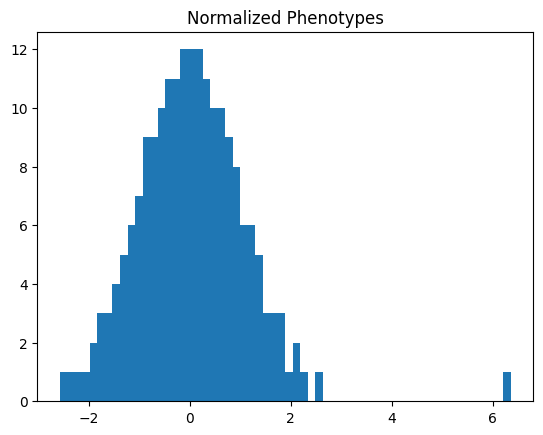

Mean of phenotypes: 0.03180670444848708
Standard deviation of phenotypes: 1.0757478165020662


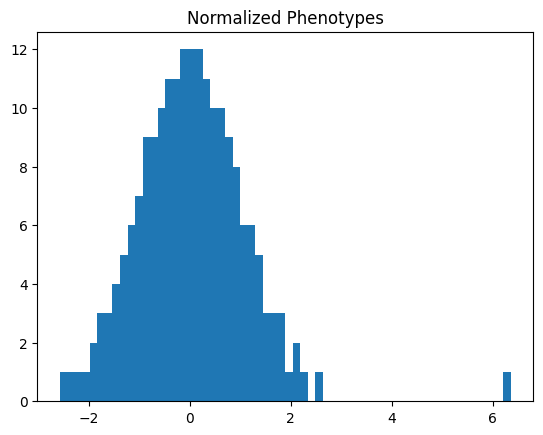

Mean of phenotypes: 0.0318067044484871
Standard deviation of phenotypes: 1.0757478165020662


In [13]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in quantile_normalized_multi_pheno.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["normalized_phenotype"], bins=60)
  plt.title("Normalized Phenotypes")
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['normalized_phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['normalized_phenotype'].std()))

In [14]:
quantile_normalized_multi_genetic = quantile_normalize(phenotypes_user_defined_multi_normal_df_1, phenotype_normalize=False)
quantile_normalized_multi_genetic

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-37.942379,-0.530231,-38.472610,-1.372204
1,1,0,-23.087706,-0.302410,-23.390116,-0.915365
2,0,1,-19.908226,0.091445,-19.816781,0.318639
3,1,1,-22.240029,-1.992444,-24.232473,-0.823894
4,0,2,-9.933216,0.862862,-9.070355,1.253565
...,...,...,...,...,...,...
395,1,197,6.632294,1.552890,8.185184,1.554774
396,0,198,-28.121344,0.605166,-27.516179,-0.524401
397,1,198,-17.527029,3.062289,-14.464740,-0.453762
398,0,199,-10.601552,0.321048,-10.280505,1.150349


In [15]:
quantile_normalized_multi_both = quantile_normalize(phenotypes_user_defined_multi_normal_df_2, normalize_both=False)
quantile_normalized_multi_both

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-37.942379,-0.530231,-38.472610,-1.405072
1,1,0,-23.087706,-0.302410,-23.390116,-0.877896
2,0,1,-19.908226,0.091445,-19.816781,0.318639
3,1,1,-22.240029,-1.992444,-24.232473,-0.954165
4,0,2,-9.933216,0.862862,-9.070355,1.310579
...,...,...,...,...,...,...
395,1,197,6.632294,1.552890,8.185184,1.695398
396,0,198,-28.121344,0.605166,-27.516179,-0.495850
397,1,198,-17.527029,3.062289,-14.464740,-0.253347
398,0,199,-10.601552,0.321048,-10.280505,1.174987
